In [2]:
import tensorflow as tf
import numpy as np
from datasets import load_dataset
import pandas as pd 
import os 

2024-07-25 12:21:13.950913: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-25 12:21:13.958934: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-25 12:21:13.968249: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-25 12:21:13.970947: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-25 12:21:13.977950: I tensorflow/core/platform/cpu_feature_guar

In [3]:
model1 = tf.keras.models.load_model('../../image_classification.keras')

I0000 00:00:1721897483.121477   26222 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1721897483.145212   26222 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1721897483.147464   26222 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1721897483.150775   26222 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [5]:
dataset = load_dataset("../../test")['train']
dataset

Dataset({
    features: ['image'],
    num_rows: 2200
})

In [6]:
labels=['baked_potato',
 'baklava',
 'caesar_salad',
 'cheese_sandwich',
 'cheesecake',
 'chicken',
 'chicken_curry',
 'chocolate_cake',
 'donuts',
 'eggs',
 'falafel',
 'fish',
 'french_fries',
 'hamburger',
 'hot_dog',
 'ice_cream',
 'lasagna',
 'omelette',
 'pizza',
 'spaghetti',
 'steak',
 'sushi',]

In [7]:
mean = np.array([103.939, 116.779, 123.68])

def preprocess_image(image, mean):
    image = tf.image.resize(image, [224, 224])
    image = image[..., ::-1]  
    image = image - mean 
    return image

def generate_label(model, dataset, batch_size=32):
    y_pred = []

    images = dataset['image']
    num_samples = len(images)
    
    for start_idx in range(0, num_samples, batch_size):
        end_idx = min(start_idx + batch_size, num_samples)
        batch_images = images[start_idx:end_idx]
        
        list1 = []
        for image in batch_images:
            list1.append(preprocess_image(image, mean))
        
        batch_images_tensor = tf.stack(list1)
        
        predictions = model.predict(batch_images_tensor)
        predicted_labels = np.argmax(predictions, axis=1)
        
        y_pred.extend(predicted_labels)
    
    return y_pred

pred = generate_label(model1, dataset)


I0000 00:00:1721897592.019777   26776 service.cc:146] XLA service 0x7a53c8002bb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721897592.019801   26776 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2024-07-25 12:23:12.068219: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-25 12:23:12.364237: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8902


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


I0000 00:00:1721897594.938961   26776 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

In [8]:
len(pred)

2200

In [9]:
Files_Name = os.listdir("../../test")
Files_Name.sort()
Files_Name

['001a051b-8e6.jpg',
 '001bfca4-b75.jpg',
 '001f9917-8d1.jpg',
 '0020bbed-a6b.jpg',
 '0028f1c3-64a.jpg',
 '004932fe-111.jpg',
 '00930d44-84f.jpg',
 '0098bbdc-150.jpg',
 '009ab5ff-fb6.jpg',
 '00b1390d-56f.jpg',
 '00e74dbe-887.jpg',
 '010a93ac-a09.jpg',
 '01259e9a-6f7.jpg',
 '0146c66c-d0c.jpg',
 '01cf0154-029.jpg',
 '01f7d27e-90c.jpg',
 '0254df9b-459.jpg',
 '02666b53-530.jpg',
 '028b4c2b-cfa.jpg',
 '028e6be4-492.jpg',
 '02a4302e-d33.jpg',
 '02b9355a-ef7.jpg',
 '02be56c2-4d7.jpg',
 '02e81e77-22f.jpg',
 '02fd4db0-fc6.jpg',
 '03338dae-9ed.jpg',
 '03343bfe-b73.jpg',
 '034fc2a8-3aa.jpg',
 '038dc31d-095.jpg',
 '03a4f8f9-b49.jpg',
 '03caf9a8-06d.jpg',
 '04132c0b-6a3.jpg',
 '044ec7e8-7bb.jpg',
 '04994893-290.jpg',
 '04b23252-c7a.jpg',
 '04cdb281-ef4.jpg',
 '04d8072b-024.jpg',
 '05004932-3ce.jpg',
 '050c486e-5cc.jpg',
 '052f39ff-56b.jpg',
 '0581cda8-959.jpg',
 '058a29c5-749.jpg',
 '058f5ba5-874.jpg',
 '05965e8e-c30.jpg',
 '05a1c50f-e57.jpg',
 '05cd59f8-fb5.jpg',
 '05d43635-21a.jpg',
 '05e40a2e-eb

In [10]:
q1_submission_resnet=pd.DataFrame(np.array([Files_Name ,[labels[item] for item in pred]]).T,columns=['name','predicted'])


In [11]:
q1_submission_resnet

,name,predicted
0,001a051b-8e6.jpg,baklava
1,001bfca4-b75.jpg,chocolate_cake
2,001f9917-8d1.jpg,fish
3,0020bbed-a6b.jpg,lasagna
4,0028f1c3-64a.jpg,hot_dog
...,...,...
2195,ff4e666f-a5c.jpg,chicken
2196,ff59a672-526.jpg,french_fries
2197,ff95b6ab-cae.jpg,french_fries
2198,ffae3d32-778.jpg,omelette


In [12]:
q1_submission_resnet.to_csv('q1_submission_res.csv', index=False)

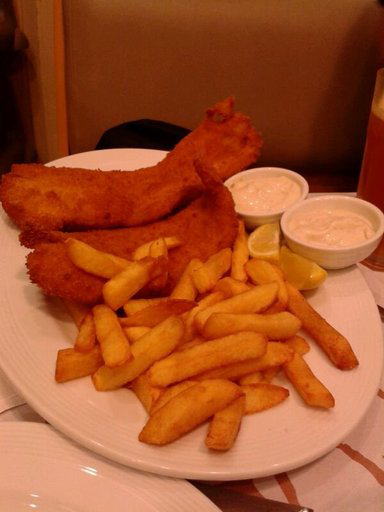

In [14]:
dataset['image'][2199]